In this Notebook we will show the distance between a model particle (5000 bp) containing a location of interest with the rest of the particles in the model

# Libraries and functions 

In [1]:
import sys
from pytadbit.modelling.structuralmodels  import StructuralModels, load_structuralmodels
import cPickle as pickle
import numpy as np
import matplotlib.backends.backend_pdf

# Parameters to modify 

## Variables defined by user 

In [2]:
# Maximum number of models to be used. From ~1500 done, we will keep the best 1000
modelsKeep = 1000
# Base path where the folder branch is stored
basePath = '/home/julen/TADdyn/TADdyn_tutorial/'
# Define the orther of the cells for the ploting
orderCell = ['Ery', 'nCD4', 'Mon']
# Define the coloring options for each cell
colors = [(120/255., 94/255., 240/255.), 
          (254/255., 97/255., 0/255.),
          (220/255., 38/255., 127/255.)
         ]
# Wether to store figures in pdf or not
saveFig = True
# In which of the model clusters we will do the analysis
clusterCheck = [1]

## Path to files with coordinates to regulatory elements
# Locations in which we will assign promoters
promFile = basePath + 'additionaInput/gene_tss.txt'
# Locations in which we will assign enhancers or other regulatory elements
enhanFile = basePath + 'additionaInput/regElem.txt'
# Locations of the promoters or enhancers in which we will focus for the distance analysis
interestFile = basePath + 'additionaInput/interest_distancePlot.txt'
# Another secondary insterest file for containign genes we want to look in more detail
# while focusing in the distances with interestFile elements
interestFile2 = basePath + 'additionaInput/interest_distancePlot2.txt'

# Optinal file with information about expression chip or other measures whose 
# location will be shown in the plots
# Format: Name Chromosome Coordinate Cell1 Cell2, Cell3, ...
# Example: Gene Chr TSS Ery nCD4 Mon  # Each Cell column has the expression value
# Of that cell in the gene that names the row
signalData = basePath + 'additionaInput/expressionData.txt'
# The signal thresshold associated to this file
thresshold = 0

# Run 

## Import additional libraries 

In [3]:
sys.path.append(basePath + 'code')
import fileHandling
import plotting
import metrics

## Define new paths 

In [4]:
# Output path for pickles and plots
outdata = basePath + 'outData/modelAnalysis/model_comparisons/distanceAnalysis/distancePlot/'
outplot = basePath + 'outPlot/modelAnalysis/model_comparisons/distanceAnalysis/distancePlot/'

# create folders
! mkdir -p {outdata}
! mkdir -p {outplot}

## Get model files and regions 

In [5]:
## Path were the models are stored
cells, regionsAll, models = fileHandling.getModelsPaths(basePath, ending='models')

## get regions
regiones = {}
# get info of the regions
for cell in cells:
    for regi in regionsAll:
        if not regi in regiones:
            
            regiones[regi] = fileHandling.getREgiInfo(basePath, regi, cell)
        else:
            infot = fileHandling.getREgiInfo(basePath, regi, cell)
            if infot != regiones[regi]:
                print('Region %s, cell %s has different parameters than previous cells')
                print('This code is not prepared to compare models with different length \
                      or resolution')

## Retrieve clustering data 

In [6]:
# If we ran this script with less models, will recover the previous clustering info
clustersPickle= basePath + 'outData/modelAnalysis/clustering/allClusterDict.pickle' 
with open(clustersPickle, "rb") as input_file:
    allClusters = pickle.load(input_file)
print('Recovering previous clustering data from:')
print(clustersPickle)

Recovering previous clustering data from:
/home/julen/TADdyn/TADdyn_tutorial/outData/modelAnalysis/clustering/allClusterDict.pickle


## Load additional input data 

In [7]:
enhAll, promAll, interAll = fileHandling.getElementCoordinates(regionsAll, regiones, enhanFile,
                          promFile, interestFile)

# second interest file
_, _, interAll2 = fileHandling.getElementCoordinates(regionsAll, regiones, enhanFile,
                          promFile, interestFile2)

Enhancer HS-E1 was in same bin as a promoter (HBE1).     Bin position 294
Enhancer enh5 was in same bin as a promoter (STIM1,MIR4687,AC090587.1).     Bin position 12
Enhancer HS5 was in same bin as a promoter (OR51AB1P).     Bin position 299
Enhancer HS7 was in same bin as a promoter (OR51B4).     Bin position 301
Enhancer 3HS1 was in same bin as a promoter (OR51V1).     Bin position 281
Enhancer HS-E1 was in same bin as a promoter (HBE1).     Bin position 294
Enhancer enh5 was in same bin as a promoter (STIM1,MIR4687,AC090587.1).     Bin position 12
Enhancer HS5 was in same bin as a promoter (OR51AB1P).     Bin position 299
Enhancer HS7 was in same bin as a promoter (OR51B4).     Bin position 301
Enhancer 3HS1 was in same bin as a promoter (OR51V1).     Bin position 281


## Get distances 

In [8]:
distancesBtw = metrics.getDistancesFromInterest(orderCell, models, regiones, 
                             allClusters, modelsKeep,
                            clusterCheck, interAll, promAll)

Ery_b-globin
nCD4_b-globin
Mon_b-globin


In [9]:
# Store distance data in pickle
with open(outdata + "Distances1promAllinterest.pickle", "wb") as output_file:
    pickle.dump(distancesBtw, output_file)
    

## Run plots 

### Without markers 

3745000 8550000


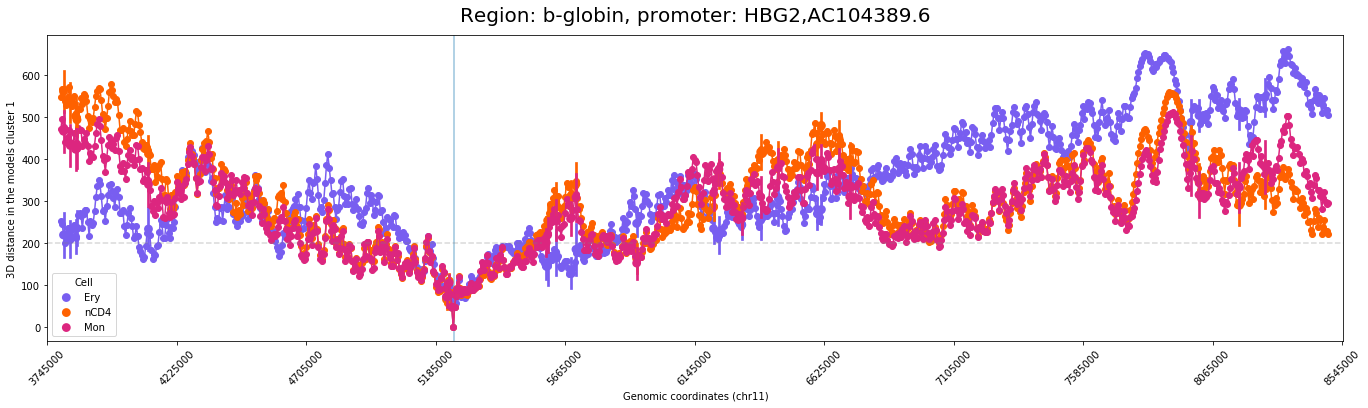

In [10]:
for regi in regionsAll:
    ## get coordinates of interest bins
    # First for the focus elements
    selected = []
    selected += [(k, interAll[regi]['promoter'][k]['name']) 
                 for k in interAll[regi]['promoter']]
    selected += [(k, interAll[regi]['enhancer'][k]['name']) 
                 for k in interAll[regi]['enhancer']]
    selected = sorted(list(set(selected)))
    # Then for the elements whose distribution we want to show
    selected2 = []
    selected2 += interAll2[regi]['enhancer'].keys()
    selected2 += interAll2[regi]['promoter'].keys()
    selected2 = sorted(list(set(selected2)))

    ## Plot
    if saveFig:
        pdf = matplotlib.backends.backend_pdf.PdfPages(outplot + 'distanceTrack_%s.pdf' %regi)
    else:
        pdf = None
        
    plotting.setLinealPlot(models, orderCell, regiones, regi, distancesBtw, selected,
                     selected2, colors, pdf=pdf)
    
    if saveFig:
        pdf.close()


### With markers 

#### Create markers variable

In [11]:
markers = fileHandling.createMarkers(enhAll, promAll, regiones, orderCell,
                 signalData, thresshold=0)

# with this function there are 3 markers
# This variable will set in which order they will be placed, first at bottom
# and last at top per each cell
markerOrder = ['Enhancers','Promoters', 'Signal']

featureColors = {'Enhancers':'#d73027', 'Promoters':'#045a8d', 'Signal':'#1a9850'}


#### Plot 

3745000 8550000


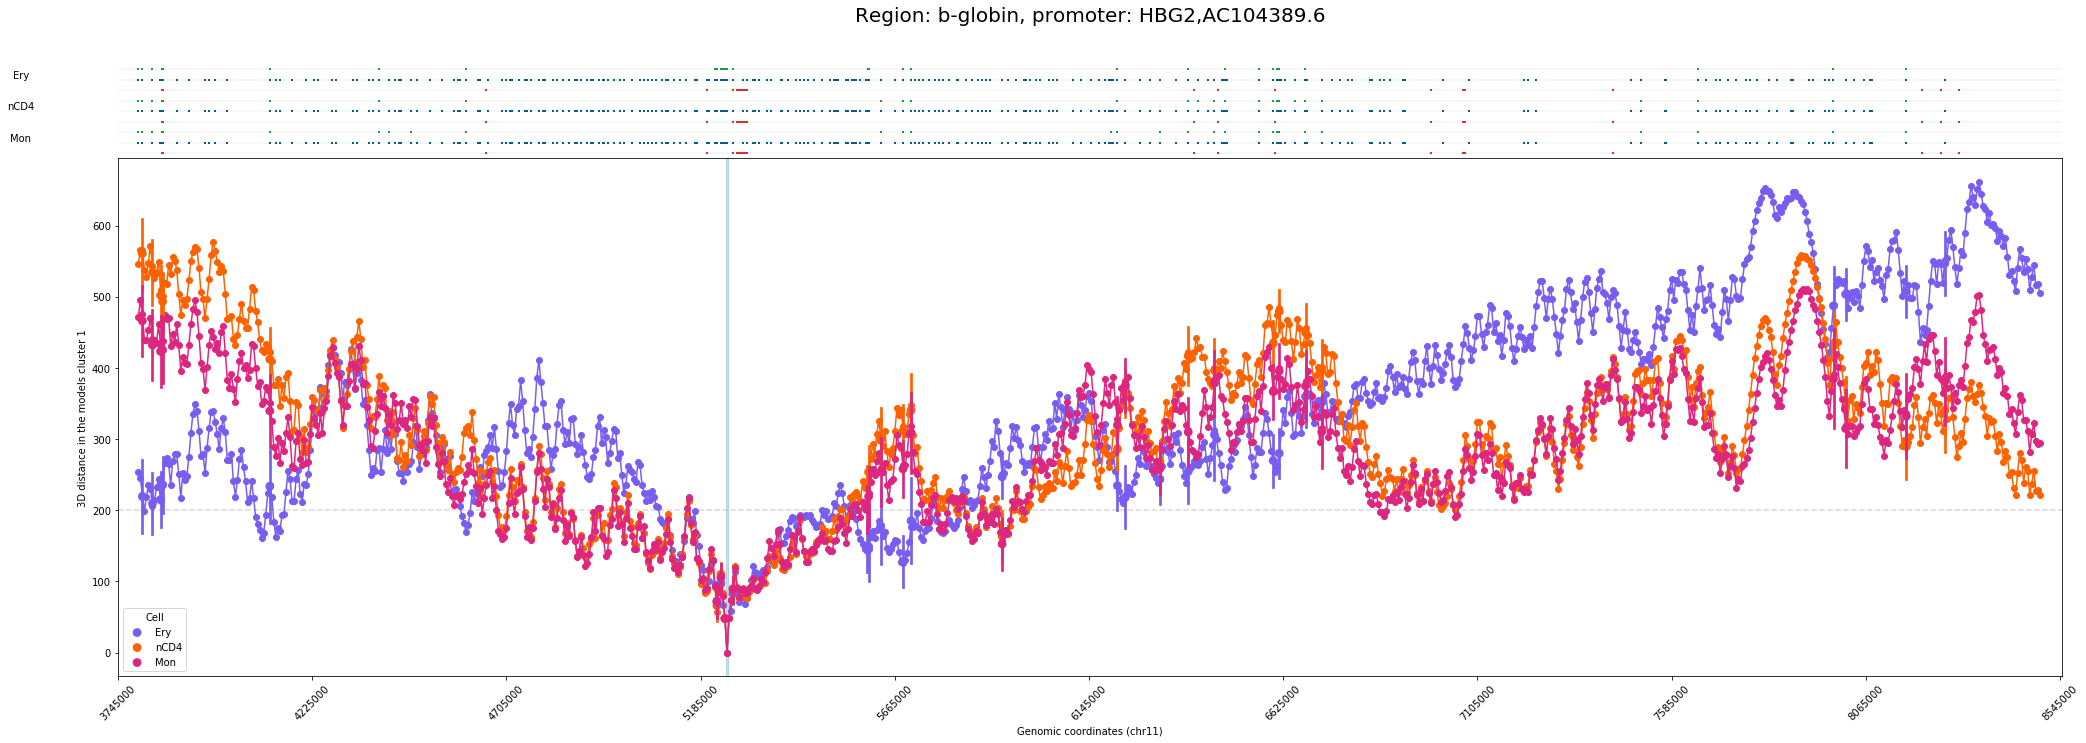

In [12]:
# This combination of parameters is the ideal for a model of 941
# particles and 3 markers. Other lengths and marker number
# would require a different combination
padlist=[0.0001,0.0001,0.002]
sizelist=['2%', '2%', '2%'] 
figsize=(30,10)
    
for regi in regionsAll:
    ## get coordinates of interest bins
    # First for the focus elements
    selected = []
    selected += [(k, interAll[regi]['promoter'][k]['name']) 
                 for k in interAll[regi]['promoter']]
    selected += [(k, interAll[regi]['enhancer'][k]['name']) 
                 for k in interAll[regi]['enhancer']]
    selected = sorted(list(set(selected)))
    # Then for the elements whose distribution we want to show
    selected2 = []
    selected2 += interAll2[regi]['enhancer'].keys()
    selected2 += interAll2[regi]['promoter'].keys()
    selected2 = sorted(list(set(selected2)))

    ## Plot
    if saveFig:
        pdf = matplotlib.backends.backend_pdf.PdfPages(outplot + 'distanceTrack_%s.pdf' %regi)
    else:
        pdf = None
        
    
    plotting.setLinealPlot(models, orderCell, regiones, regi, distancesBtw, selected,
                     selected2, colors, pdf=pdf, markerOrder=markerOrder, markers=markers,
                 padlist=padlist, sizelist=sizelist, figsize=figsize, featureColors=featureColors)
    
    if saveFig:
        pdf.close()
